In [1]:
#import the libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sea
from datetime import datetime, timedelta
print("Done")

Done


In [2]:
#load the dataset
dset = pd.read_csv('ecommerce_data.csv')
print("Loaded")
print(f"Rows: {dset.shape[0]} Cols: {dset.shape[1]}")
print(f"Cols are:\n {dset.columns.tolist()}")

Loaded
Rows: 94983 Cols: 8
Cols are:
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [3]:
# First 5 rows
print("First 5 rows")
dset.head(5)

First 5 rows


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,INV001000,SKU7823,XL Non-Stick Frying Pan,1,2023-05-24 00:00:00,29.17,C002279,Netherlands
1,INV001001,SKU4603,Deluxe Water Bottle with Time Marker,3,2024-03-29 00:00:00,14.54,C003035,United Kingdom
2,INV001002,SKU3092,Desk Lamp LED,1,2023-01-16 00:00:00,39.18,C000595,United Kingdom
3,INV001003,SKU0924,Deluxe Facial Cleansing Brush,1,2024-02-21 00:00:00,30.19,C001447,United Kingdom
4,INV001004,SKU1310,XL Stainless Steel Water Bottle,2,2023-06-18 00:00:00,17.12,C002719,United Kingdom


In [4]:
# Data types
print("Data Types")
dset.info()

Data Types
<class 'pandas.DataFrame'>
RangeIndex: 94983 entries, 0 to 94982
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    94983 non-null  str    
 1   StockCode    94983 non-null  str    
 2   Description  94983 non-null  str    
 3   Quantity     94983 non-null  int64  
 4   InvoiceDate  94983 non-null  str    
 5   UnitPrice    94983 non-null  float64
 6   CustomerID   92134 non-null  str    
 7   Country      94983 non-null  str    
dtypes: float64(1), int64(1), str(6)
memory usage: 5.8 MB


In [5]:
# Check for missing values & remove them
missvals = dset.isnull().sum()
print(f"No. of rows with missing vals: {missvals[missvals>0]}")
dset = dset.dropna()
print(f"New rows - {dset.shape[0]} & cols - {dset.shape[1]}")

No. of rows with missing vals: CustomerID    2849
dtype: int64
New rows - 92134 & cols - 8


In [6]:
# Check for cancelled invoices
cancelled = dset[dset['InvoiceNo'].astype(str).str.startswith('C')]
lencancelled = len(cancelled)
print(f"No of Cancelled invoices: {lencancelled}")
dset = dset[~dset['InvoiceNo'].astype(str).str.startswith('C')]
print(f"New row - {dset.shape[0]} & cols - {dset.shape[1]}")

No of Cancelled invoices: 4593
New row - 87541 & cols - 8


In [7]:
# Check for -ve quantities & remove them
neg = (dset['Quantity']<=0).sum()
print(f"Negative or zero quantities: {neg}")
dset = dset[dset['Quantity']>0]
print(f"New rows - {dset.shape[0]} & cols - {dset.shape[1]}")

Negative or zero quantities: 1756
New rows - 85785 & cols - 8


In [8]:
#Invalid price
inv = (dset['UnitPrice']<=0).sum()
print(f"Invalid price is -ve price: {inv}")
dset = dset[dset['UnitPrice']>0]
print(f"New rows - {dset.shape[0]} & cols - {dset.shape[1]}")

Invalid price is -ve price: 875
New rows - 84910 & cols - 8


In [9]:
#convert date to datetime
dset['InvoiceDate'] = pd.to_datetime(dset['InvoiceDate'])
print(f"check data type for invoice date is {dset['InvoiceDate'].dtype}")

check data type for invoice date is datetime64[us]


In [10]:
# Create derived features
dset['Total_Price'] = dset['UnitPrice'] * dset['Quantity']
dset['Year_Month'] = dset['InvoiceDate'].dt.to_period('M')
dset['Day of week'] = dset['InvoiceDate'].dt.day_name()
dset['Day'] = dset['InvoiceDate'].dt.day
dset['Month'] = dset['InvoiceDate'].dt.month
dset['Year'] = dset['InvoiceDate'].dt.year
dset['Qtr'] = dset['InvoiceDate'].dt.quarter
print("First 5 rows")
dset.head(5)

First 5 rows


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Year_Month,Day of week,Day,Month,Year,Qtr
0,INV001000,SKU7823,XL Non-Stick Frying Pan,1,2023-05-24,29.17,C002279,Netherlands,29.17,2023-05,Wednesday,24,5,2023,2
1,INV001001,SKU4603,Deluxe Water Bottle with Time Marker,3,2024-03-29,14.54,C003035,United Kingdom,43.62,2024-03,Friday,29,3,2024,1
2,INV001002,SKU3092,Desk Lamp LED,1,2023-01-16,39.18,C000595,United Kingdom,39.18,2023-01,Monday,16,1,2023,1
3,INV001003,SKU0924,Deluxe Facial Cleansing Brush,1,2024-02-21,30.19,C001447,United Kingdom,30.19,2024-02,Wednesday,21,2,2024,1
4,INV001004,SKU1310,XL Stainless Steel Water Bottle,2,2023-06-18,17.12,C002719,United Kingdom,34.24,2023-06,Sunday,18,6,2023,2


In [11]:
# total rows removed
removed = missvals[missvals>0].sum() + lencancelled + neg + inv
print(f"No of rows removed: {removed:,}")
perrr = ((removed/(dset.shape[0]+removed))*100).round(2)
print(f"%of rows removed: {perrr}%")

No of rows removed: 10,073
%of rows removed: 10.61%


In [12]:
# Verify cleaned data
Total_rev = dset['Total_Price'].sum()
print(f"Total Revenue generated = {Total_rev:,.2f}")
Total_orders = dset['InvoiceNo'].nunique()
print(f"Total Orders = {Total_orders:,}")
custs = dset['CustomerID'].nunique()
print(f"No of unique customers = {custs:,}")
conr = dset['Country'].nunique()
print(f"No of countries = {conr:,}")
unique_products = dset['Description'].nunique()
print(f"No of unique products = {unique_products}")

order_val = dset.groupby('InvoiceNo')['Total_Price'].sum()
aov = order_val.mean().round(2)
print(f"Average Order value = {aov:,}")

cust_spend = dset.groupby('CustomerID')['Total_Price'].sum()
acs = cust_spend.mean().round(2)
print(f"Average customer spend = {acs:,}")

orders_per_cust = dset.groupby('CustomerID')['InvoiceNo'].nunique()
aov_per_cust = cust_spend/orders_per_cust

print(f"Showing aov per cust for first 5 rcustomers:\n{aov_per_cust.head(5)}")

Total Revenue generated = 5,881,870.05
Total Orders = 84,910
No of unique customers = 3,994
No of countries = 10
No of unique products = 173
Average Order value = 69.27
Average customer spend = 1,472.68
Showing aov per cust for first 5 rcustomers:
CustomerID
C000001    51.060000
C000002    82.926765
C000003    72.760000
C000004    93.092105
C000005    83.793077
dtype: float64


In [13]:
# Finding revenue, orders & customers in each month (do this everytime before generating graph)
monthly_orders =  dset.groupby('Year_Month')['InvoiceNo'].nunique()
monthly_custs = dset.groupby('Year_Month')['CustomerID'].nunique()
monthly_revenue = dset.groupby('Year_Month')['Total_Price'].sum()
daily_revenue = dset.groupby(['Year_Month','Day'])['Total_Price'].sum()
monthly_orders.index = monthly_orders.index.to_timestamp()
monthly_custs.index = monthly_custs.index.to_timestamp()
monthly_revenue.index = monthly_revenue.index.to_timestamp()

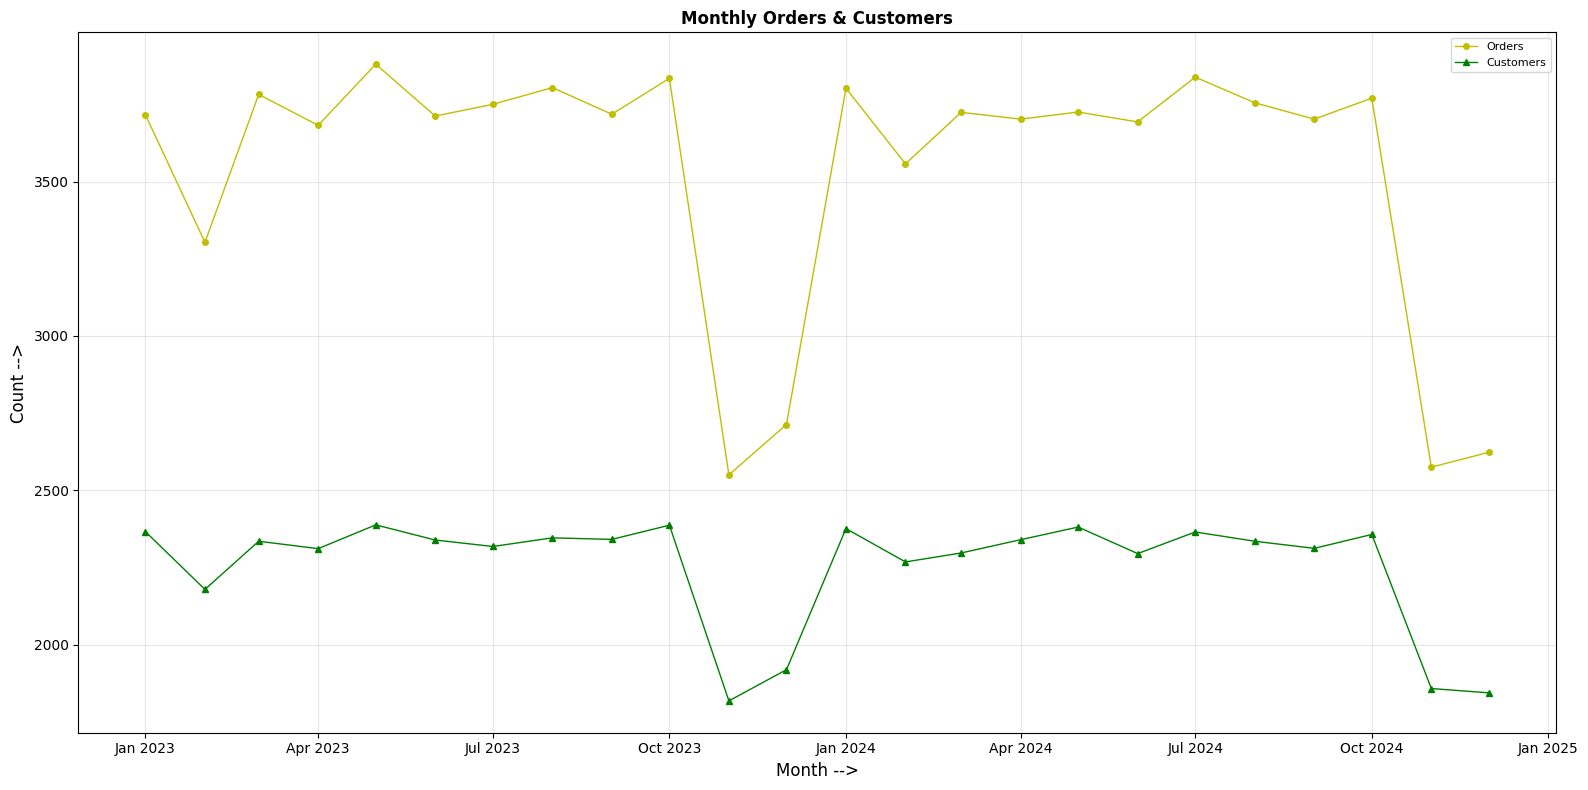

In [14]:
#Plot a graph - Monthly orders & custs
import matplotlib.dates as mdates
monthly_orders = monthly_orders.sort_index()
monthly_custs = monthly_custs.sort_index()

fig, ax = pl.subplots(figsize=(16,8))
ax.plot(monthly_orders.index, monthly_orders.values,'y-',marker='o',linewidth=1,markersize=4, label="Orders")
ax.plot(monthly_orders.index, monthly_custs.values,'g-',marker='^',linewidth=1,markersize=4, label="Customers")
ax.set_title('Monthly Orders & Customers',fontsize=12,fontweight='bold')
ax.set_xlabel('Month -->', fontsize=12)
ax.set_ylabel('Count -->',fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=8)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
pl.tight_layout()
pl.show()

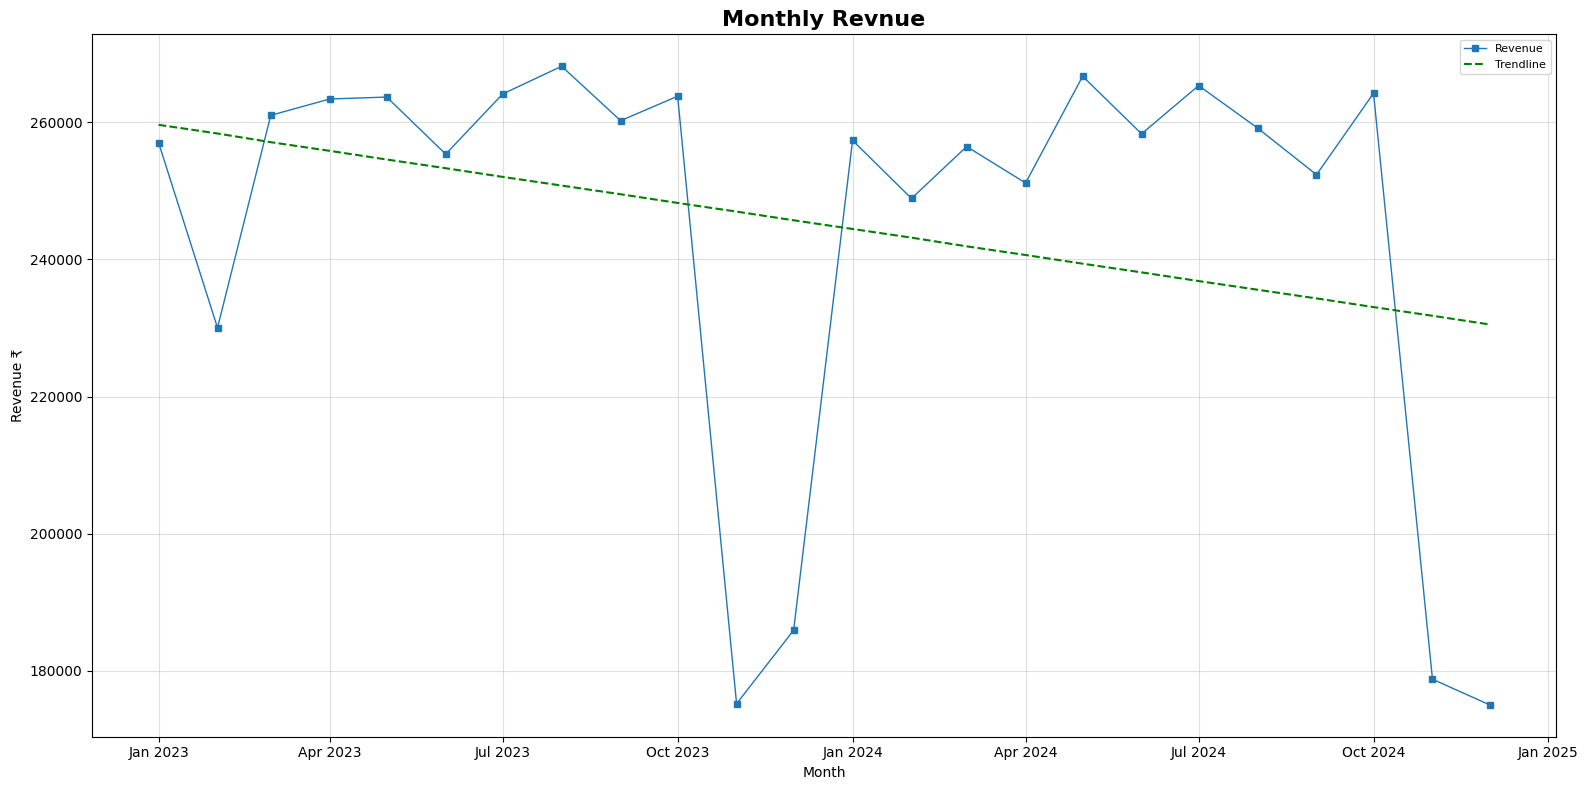

In [15]:
#Monthly Revenue Plot
import matplotlib.dates as mdates
monthly_rvenue = monthly_revenue.sort_index()
fig, ax = pl.subplots(figsize = (16,8))
ax.plot(monthly_revenue.index, monthly_revenue.values,linewidth=1,marker='s',markersize=4,label='Revenue')
ax.set_title('Monthly Revnue',fontsize=16,fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Revenue ₹')

z = np.polyfit(range(len(monthly_revenue)),monthly_revenue.values,1)
pp = np.poly1d(z)(range(len(monthly_revenue)))
ax.plot(monthly_revenue.index, pp,'g--',label='Trendline')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.4)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

pl.tight_layout()
pl.show()

-1,265.58
This is the degrowth of revenue every month in ₹
MoM Growth % = -0.5%


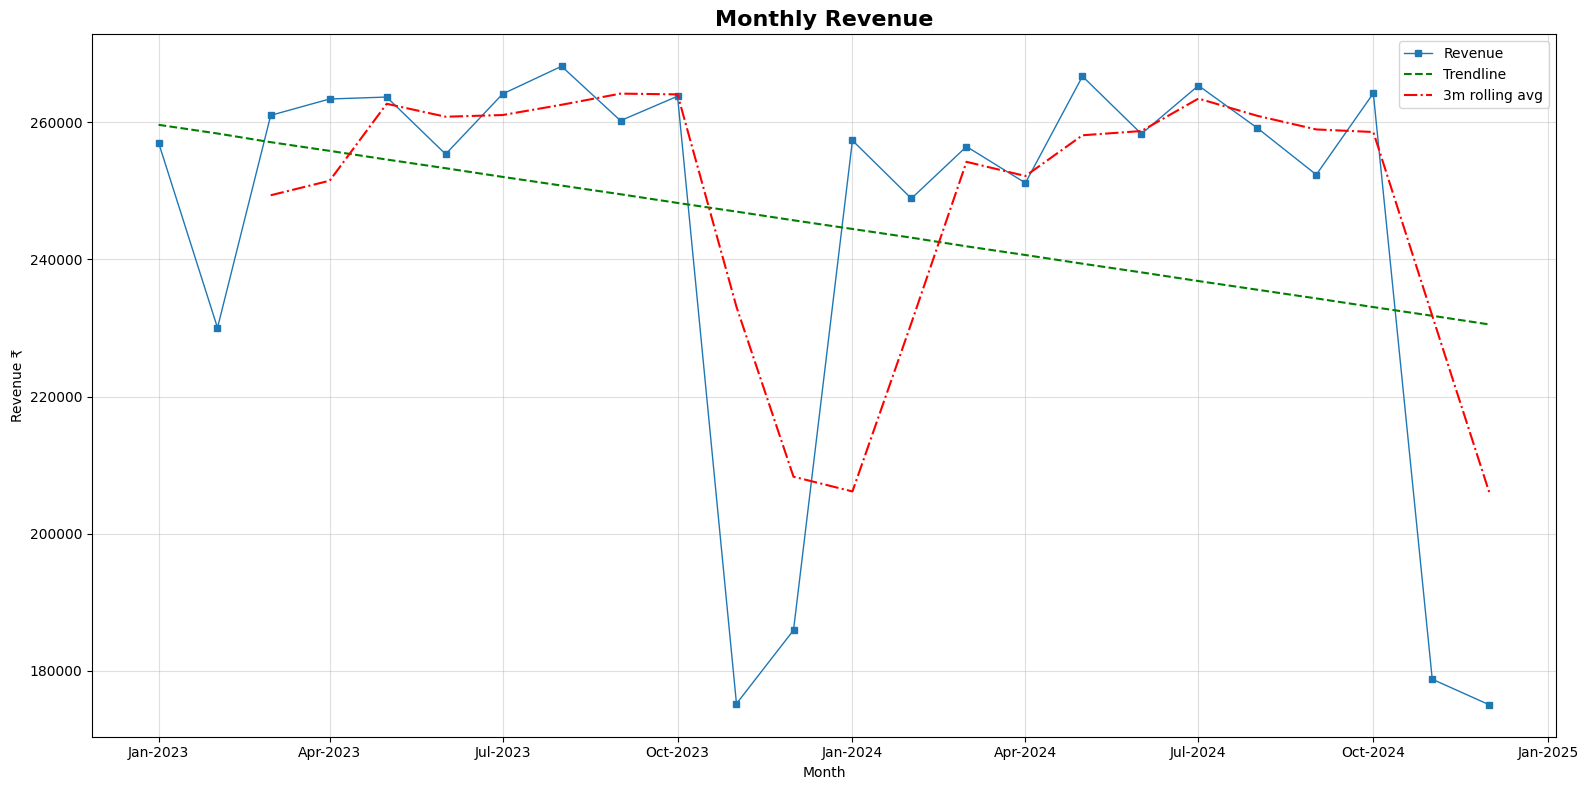

In [16]:
import matplotlib.dates as mdates
monthly_rvenue = monthly_revenue.sort_index()
avg_revenue = monthly_revenue.mean()

fig, ax = pl.subplots(figsize =(16,8))

z = np.polyfit(range(len(monthly_revenue)),monthly_revenue.values,1)
slope = z[0]
intercept = z[1]
print(f"{slope:,.2f}")
print("This is the degrowth of revenue every month in ₹")

mom_growth_pct = (slope/avg_revenue)*100
print(f"MoM Growth % = {mom_growth_pct:.1f}%")

trendline = np.poly1d(z)(range(len(monthly_revenue)))
# 3-month rolling average
rolling_3m = monthly_revenue.rolling(window=3).mean()

ax.plot(monthly_revenue.index,monthly_revenue.values,marker = 's',linewidth=1,label='Revenue',markersize=4)
ax.plot(monthly_revenue.index,trendline,'g--',label='Trendline')
ax.plot(monthly_revenue.index,rolling_3m,'r-.',label='3m rolling avg')
ax.set_xlabel('Month')
ax.set_ylabel('Revenue ₹')
ax.set_title('Monthly Revenue',fontsize=16,fontweight='bold')
ax.legend()
ax.grid(True,alpha=0.4)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

pl.tight_layout()
pl.show()

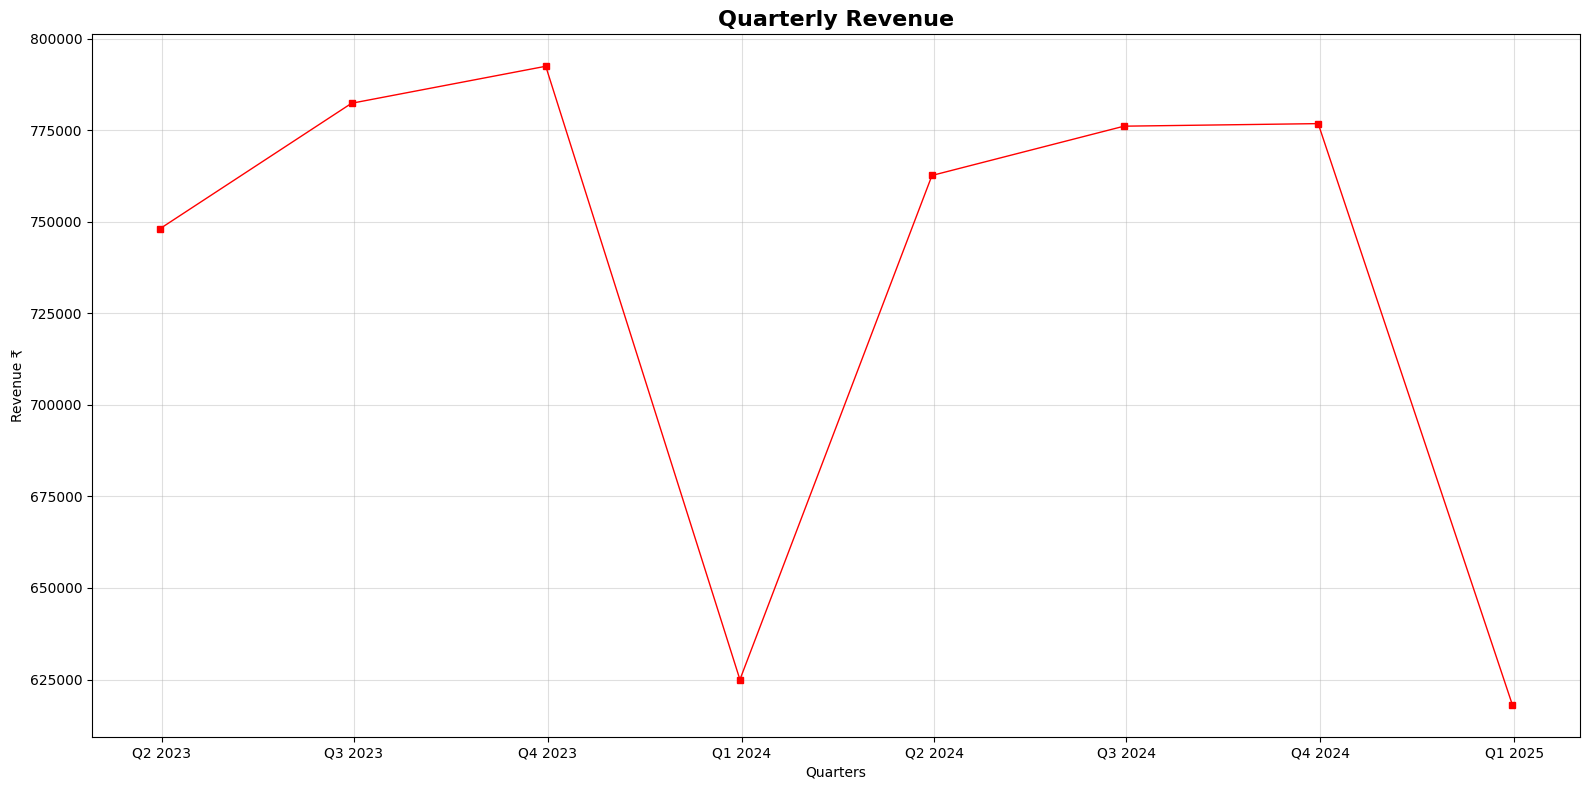

In [17]:
#Quarterly Revenue
from matplotlib.ticker import FuncFormatter as fm
fig, ax =pl.subplots(figsize=(16,8))
quarterly = monthly_revenue.resample('QE').sum()
ax.plot(quarterly.index,quarterly.values,'r-',linewidth=1,marker='s',markersize=4)
ax.set_title('Quarterly Revenue',fontsize=16,fontweight='bold')
ax.set_xlabel('Quarters')
ax.set_ylabel('Revenue ₹')
ax.grid(True,alpha=0.4)

def quarter_formatter(x, pos):
    dt = mdates.num2date(x) 
    q = (dt.month - 1) // 3 + 1
    return f"Q{q} {dt.year}"

ax.xaxis.set_major_formatter(fm(quarter_formatter))


pl.tight_layout()
pl.show()

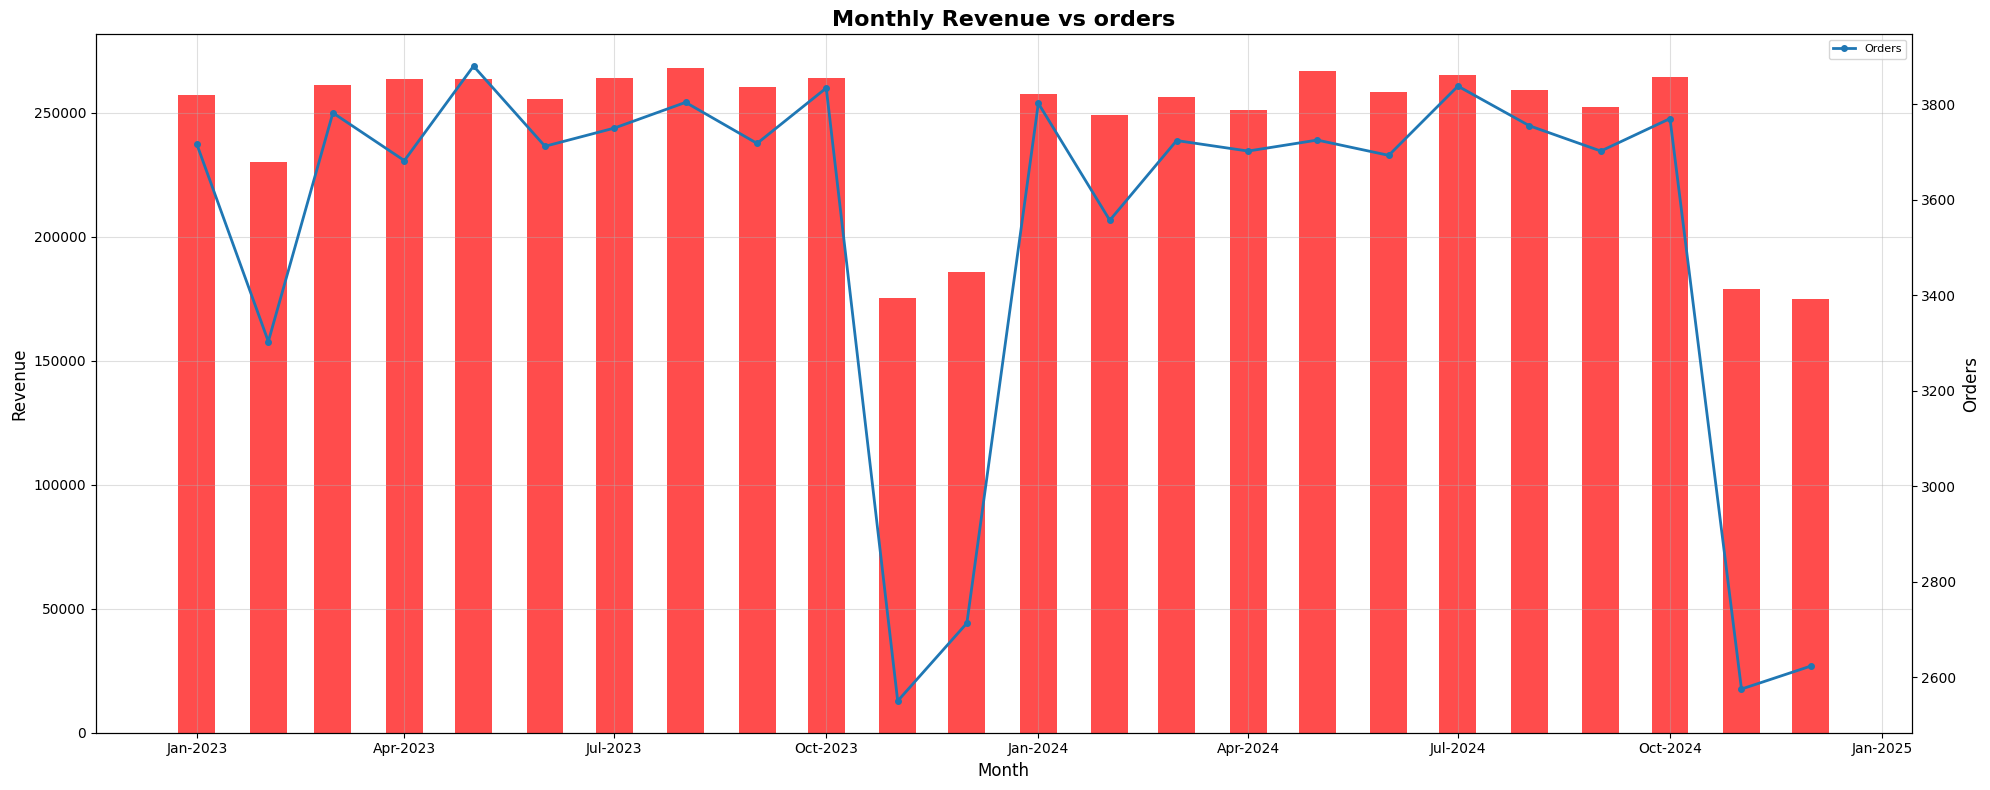

In [18]:
#Monthly revenue vs orders
monthly_revenue = monthly_revenue.sort_index()
monthly_orders = monthly_orders.sort_index()

fig, ax1 = pl.subplots(figsize = (20,8))
ax1.bar(monthly_revenue.index, monthly_revenue.values, width = 16, color='red', alpha=0.7)
ax1.set_title('Monthly Revenue vs orders',fontsize=16,fontweight='bold')
ax1.set_xlabel('Month',fontsize=12)
ax1.set_ylabel('Revenue',fontsize=12)
ax1.grid(True,alpha=0.4)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

ax2=ax1.twinx()
ax2.plot(monthly_orders.index,monthly_orders.values,marker='o',markersize=4,linewidth=2,label='Orders')
ax2.set_ylabel('Orders',fontsize=12)
ax2.legend(fontsize=8)

pl.tight_layout()
pl.savefig('Month revenue vs orders.png', dpi =300, bbox_inches='tight')
pl.show()

In [19]:
import os
os.getcwd()

'C:\\Users\\91912'

In [20]:
#Top 20 products by revenue (For this we have to put it in a dataframe)
product_performance = dset.groupby('Description').agg({
'Total_Price':'sum',
'Quantity':'sum',
'CustomerID':'nunique',
'InvoiceNo':'nunique'
}).reset_index()

product_performance.columns=['Items','Revenue','Units_sold','Customers','Orders']
product_performance=product_performance.sort_values('Revenue',ascending=False)

top20 = product_performance.head(20)
print(f"Top 20 products by revenue:\n {top20.to_string(index=False)}")

# % Contribution of top 20 products
print(f"\nContribution of top 20 products:\n ₹{top20['Revenue'].sum():,.2f} ({top20['Revenue'].sum()/Total_rev*100:,.1f})%")

#Now sort top 20 products by revenue

Top 20 products by revenue:
                                 Items   Revenue  Units_sold  Customers  Orders
       Compact Essential Oil Diffuser 118781.78        3376       1092    1333
           Deluxe Electric Toothbrush 111420.07        2152        767     853
             Premium Hair Dryer Brush  97323.14        2081        727     803
                   Pro Bath Towel Set  86835.12        2202        735     816
 Compact Portable Power Bank 10000mAh  71857.01        2286        788     883
Premium Wireless Bluetooth Headphones  71200.26        1131        418     442
     XL Wireless Bluetooth Headphones  69650.03        1115        414     436
        Wireless Bluetooth Headphones  68968.09        1116        388     411
           Pro Facial Cleansing Brush  67961.96        2191        774     859
             Deluxe Kitchen Knife Set  66681.87        1160        403     430
 Deluxe Glass Food Storage Containers  62703.62        2081        732     825
              Pro Elect

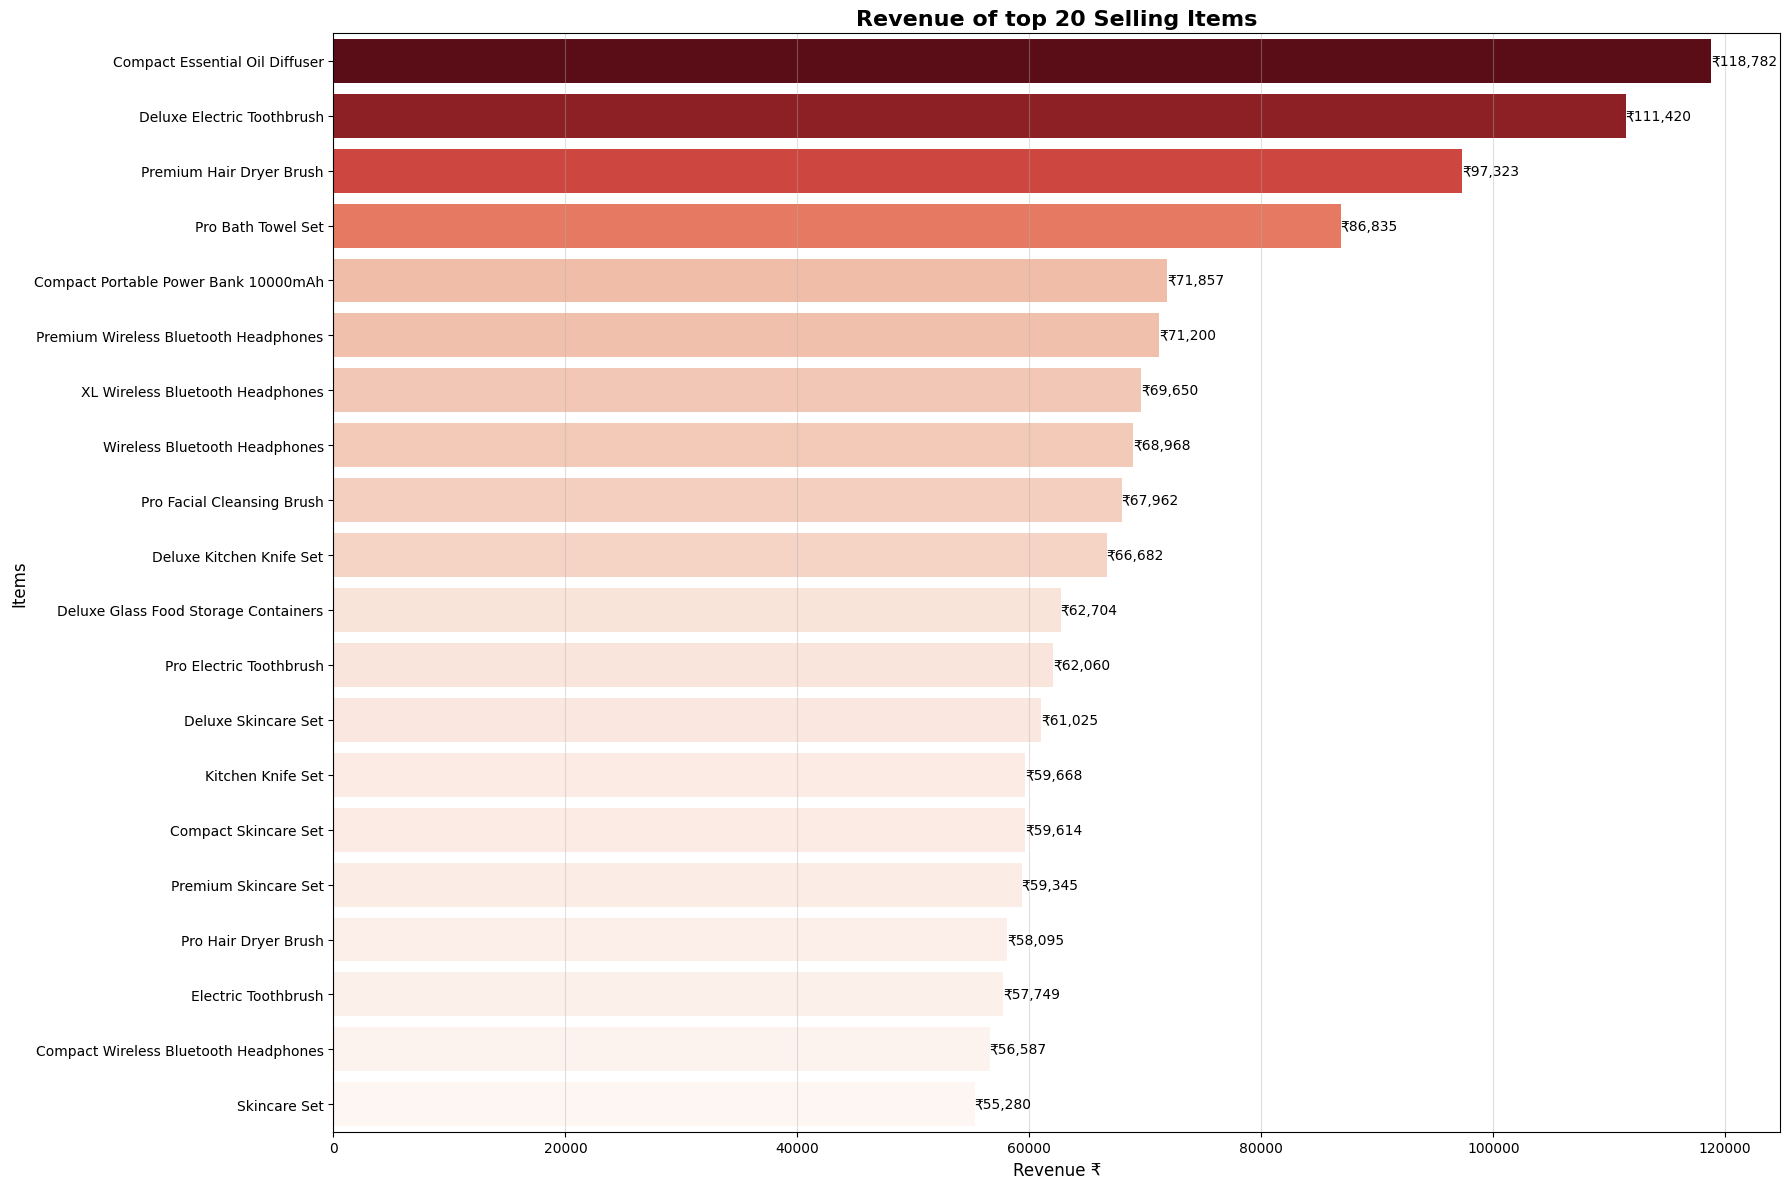

In [21]:
#Plotting top 20 products
fig, ax =pl.subplots(figsize=(18,12))
top20 = top20.sort_values('Revenue', ascending=False)
ax = sea.barplot(
    data=top20,
    y='Items',
    x='Revenue',
    hue='Revenue',
    palette='Reds',
    dodge=False,
    legend=False
)
for p in ax.patches: 
    width = p.get_width() 
    ax.text(width, p.get_y() + p.get_height() / 2, f'₹{width:,.0f}', va='center', ha='left', fontsize=10 )
ax.set_title('Revenue of top 20 Selling Items',fontsize=16,fontweight='bold')
ax.set_xlabel('Revenue ₹',fontsize=12)
ax.set_ylabel("Items", fontsize = 12)

ax.grid(True,axis='x',alpha=0.4)

pl.tight_layout()
pl.show()

In [22]:
#RFM Analysis
analysis_date = dset['InvoiceDate'].max()+timedelta(days=1)

rfm = dset.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Total_Price': 'sum'
}).reset_index()
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']
rfm.describe()

,Recency,Frequency,Monetary
count,3994.000000,3994.000000,3994.000000
mean,52.825238,21.259389,1472.676527
std,61.954909,8.869469,696.024038
min,1.000000,1.000000,15.920000
25%,14.000000,15.000000,961.920000
50%,36.000000,22.000000,1470.870000
75%,70.000000,28.000000,1929.407500
max,728.000000,47.000000,4376.110000


In [23]:
#RFM Score (1-4)
quantiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.25,0.5,0.75])

def scores(x, p, d):
    if p == 'Recency':
        if x <= d[p][0.25]:
            return 4
        elif x <= d[p][0.50]:
            return 3
        elif x <= d[p][0.75]:
            return 2
        else:
            return 1
    else:
        if x <= d[p][0.25]:
            return 1
        elif x <= d[p][0.50]:
            return 2
        elif x <= d[p][0.75]:
            return 3
        else:
            return 4

rfm['r'] = rfm['Recency'].apply(scores, args = ('Recency', quantiles))
rfm['f'] = rfm['Frequency'].apply(scores, args = ('Frequency', quantiles))
rfm['m'] = rfm['Monetary'].apply(scores, args = ('Monetary', quantiles))

rfm['RFM_score'] = rfm[['r','f','m']].sum(axis=1)

rfm.tail(5)

,Customer ID,Recency,Frequency,Monetary,r,f,m,RFM_score
3989,C003996,51,26,2305.08,2,3,4,9
3990,C003997,81,15,1949.27,1,1,4,6
3991,C003998,34,17,1143.19,3,2,2,7
3992,C003999,6,30,2237.56,4,4,4,12
3993,C004000,18,13,975.65,3,1,2,6


In [24]:
#Define segment
def assign(x):
    if x >=10:
        return 'Champions'
    elif x >=8:
        return 'Loyals'
    elif x >=6:
        return 'Potential Loyalists'
    elif x >=4:
        return 'At Risk'
    else:
        return 'Lost'

rfm['RFM_Segment'] = rfm['RFM_score'].apply(assign)
champs = (rfm['RFM_Segment']=='Champions').sum()
loyals = (rfm['RFM_Segment']=='Loyals').sum()
pots = (rfm['RFM_Segment']=='Potential Loyalists').sum()
risks = (rfm['RFM_Segment']=='At Risk').sum()
lost = (rfm['RFM_Segment']=='Lost').sum()

rfm.head(10)

,Customer ID,Recency,Frequency,Monetary,r,f,m,RFM_score,RFM_Segment
0,C000001,59,17,868.02,2,2,1,5,At Risk
1,C000002,1,34,2819.51,4,4,4,12,Champions
2,C000003,31,24,1746.24,3,3,3,9,Loyals
3,C000004,1,19,1768.75,4,2,3,9,Loyals
4,C000005,18,13,1089.31,3,1,2,6,Potential Loyalists
5,C000006,17,17,1525.23,3,2,3,8,Loyals
6,C000007,277,6,312.91,1,1,1,3,Lost
7,C000008,92,30,1958.14,1,4,4,9,Loyals
8,C000009,14,25,2477.96,4,3,4,11,Champions
9,C000010,7,33,2526.34,4,4,4,12,Champions


In [43]:
disp = rfm.groupby('RFM_Segment').agg({
    'Customer ID': 'count',
    'Monetary': 'sum',
    'Frequency': 'mean',
    'Recency': 'mean'
})

disp.columns = ['Customers', 'Total_Revenue', 'Avg_Frequency', 'Avg_Recency']
disp = disp.round(2)
disp = disp.sort_values('Total_Revenue', ascending=False)
print(disp)
ch_p = (disp.loc['Loyals', 'Customers'] / custs * 100)
chr_p = (disp.loc['Loyals', 'Total_Revenue'] / Total_rev * 100)
print(f"\n{ch_p:.1f} % of customers generate {chr_p:.1f} % of Revenue.")

                     Customers  Total_Revenue  Avg_Frequency  Avg_Recency
RFM_Segment                                                              
Champions                 1060     2360569.05          30.86        18.45
Loyals                     973     1647423.45          24.43        34.32
Potential Loyalists        864     1074403.03          18.57        45.50
At Risk                    645      572169.35          13.48        68.64
Lost                       452      227305.17           8.17       164.71

24.4 % of customers generate 28.0 % of Revenue.


RFM_Segment
Champions              1060
Loyals                  973
Potential Loyalists     864
At Risk                 645
Lost                    452
Name: Customers, dtype: int64


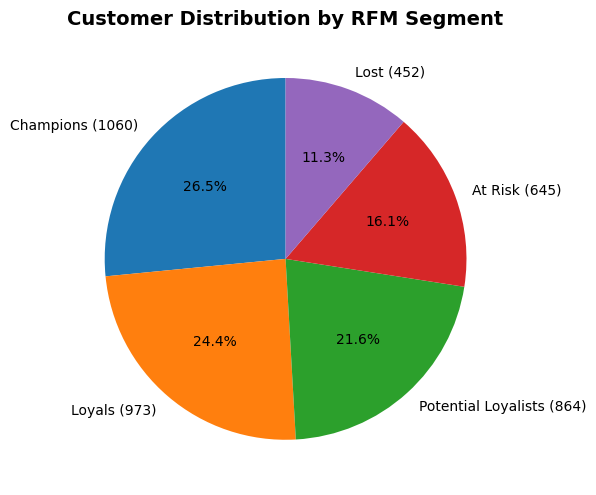

In [26]:
#Visualize this in pie chart & heat map
print(disp['Customers'])
pl.figure(figsize=(6, 6))
disp['labels'] = disp.index + " (" + (disp['Customers'].astype(str)) + ")"
pl.pie(
    disp['Customers'],
    labels=disp['labels'],
    autopct='%1.1f%%',
    startangle=90
)

pl.title('Customer Distribution by RFM Segment', fontsize=14, fontweight='bold')
pl.tight_layout()
pl.show()

                     Customers  Total_Revenue  Avg_Frequency  Avg_Recency  \
RFM_Segment                                                                 
Lost                       452      227305.17           8.17       164.71   
At Risk                    645      572169.35          13.48        68.64   
Potential Loyalists        864     1074403.03          18.57        45.50   
Loyals                     973     1647423.45          24.43        34.32   
Champions                 1060     2360569.05          30.86        18.45   

                                        labels  
RFM_Segment                                     
Lost                                Lost (452)  
At Risk                          At Risk (645)  
Potential Loyalists  Potential Loyalists (864)  
Loyals                            Loyals (973)  
Champions                     Champions (1060)  


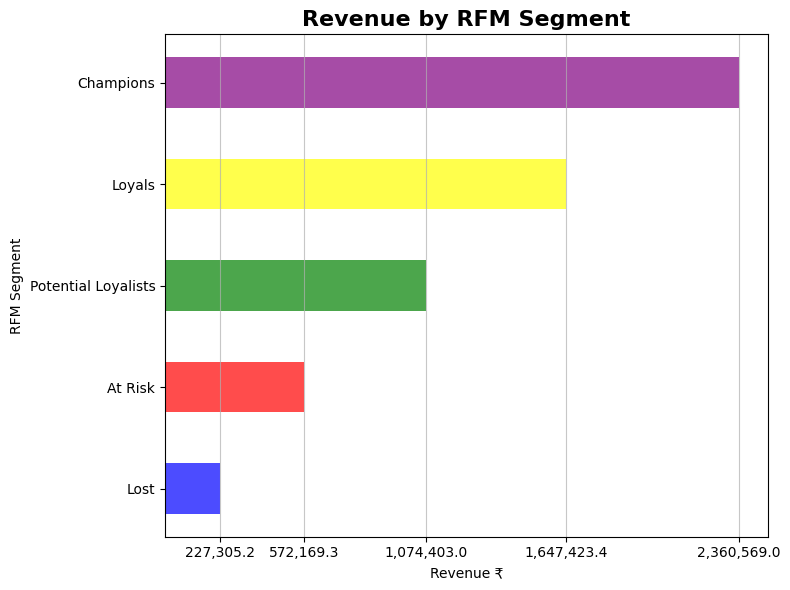

In [27]:
import matplotlib.ticker as mtick
pl.figure(figsize=(8,6))
disp = disp.sort_values('Total_Revenue',ascending = True)
print(disp)
pl.barh(disp.index, disp['Total_Revenue'].values,height =0.5, color = ['blue','red','green','yellow','purple'], alpha=0.7)
pl.title('Revenue by RFM Segment', fontsize=16,fontweight='bold')
pl.xlabel('Revenue ₹')
pl.gca().xaxis.set_major_formatter(
    mtick.StrMethodFormatter('{x:,.1f}')
)
pl.xticks(disp['Total_Revenue'])
pl.ylabel('RFM Segment')
pl.grid(True, axis='x',alpha=0.7)
pl.tight_layout()
pl.show()

                     Frequency  Recency  Monetary
RFM_Segment                                      
Champions                  1.0      1.0       1.0
Loyals                     0.7      0.9       0.7
Potential Loyalists        0.5      0.8       0.4
At Risk                    0.2      0.7       0.2
Lost                       0.0      0.0       0.0


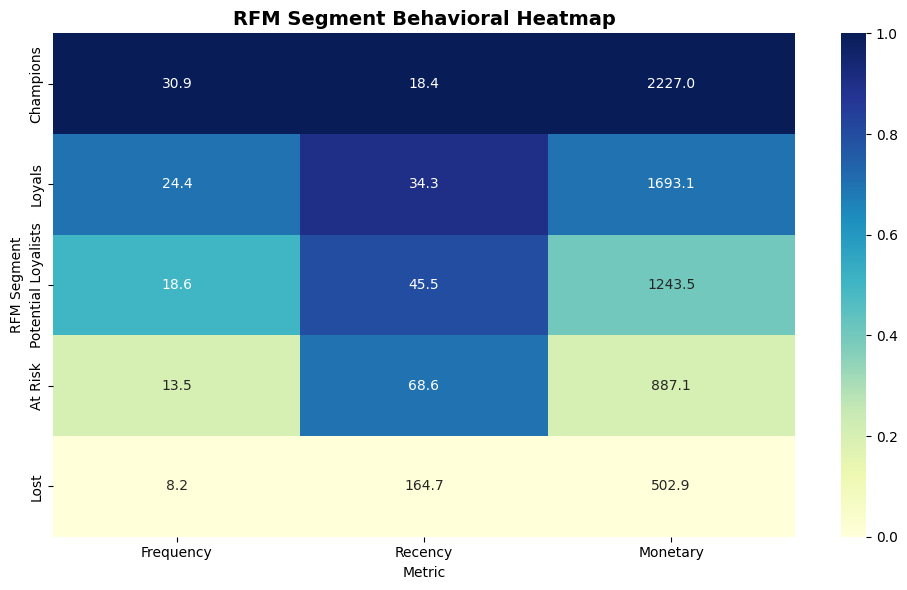

In [28]:
#Heat Map
heatmap_data = rfm.groupby('RFM_Segment').agg({
    'Frequency': 'mean',
    'Recency': 'mean',
    'Monetary': 'mean'
})

order = ['Champions', 'Loyals', 'Potential Loyalists', 'At Risk', 'Lost']
heatmap_data = heatmap_data.loc[order]

pl.figure(figsize=(10, 6))

heatmap_norm = ((heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())).round(1)
heatmap_norm['Recency'] = 1 - heatmap_norm['Recency']
print(heatmap_norm)

sea.heatmap(
    heatmap_norm,
    annot=heatmap_data.round(1),
    fmt='',
    cmap='YlGnBu'
)

pl.title('RFM Segment Behavioral Heatmap', fontsize=14, fontweight='bold')
pl.ylabel('RFM Segment')
pl.xlabel('Metric')
pl.tight_layout()
pl.show()

In [29]:
# Sales by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = dset.groupby('Day of week').agg({
    'Total_Price': 'sum',
    'InvoiceNo': 'nunique'
}).reindex(day_order)
day_sales.columns = ['Revenue', 'Orders']

print("Sales by Day of Week:")
print(day_sales)

best_day = day_sales['Revenue'].idxmax()
worst_day = day_sales['Revenue'].idxmin()
print(f"\nBest day: {best_day} (₹{day_sales.loc[best_day, 'Revenue']:,.2f})")
print(f"Worst day: {worst_day} (₹{day_sales.loc[worst_day, 'Revenue']:,.2f})")
print(f"Difference: {((day_sales.loc[best_day, 'Revenue'] / day_sales.loc[worst_day, 'Revenue'] - 1) * 100):.1f}%")

Sales by Day of Week:
               Revenue  Orders
Day of week                   
Monday       852787.98   12455
Tuesday      848996.69   12266
Wednesday    832690.21   12094
Thursday     834825.11   11962
Friday       831434.22   12037
Saturday     839695.83   11877
Sunday       841440.01   12219

Best day: Monday (₹852,787.98)
Worst day: Friday (₹831,434.22)
Difference: 2.6%


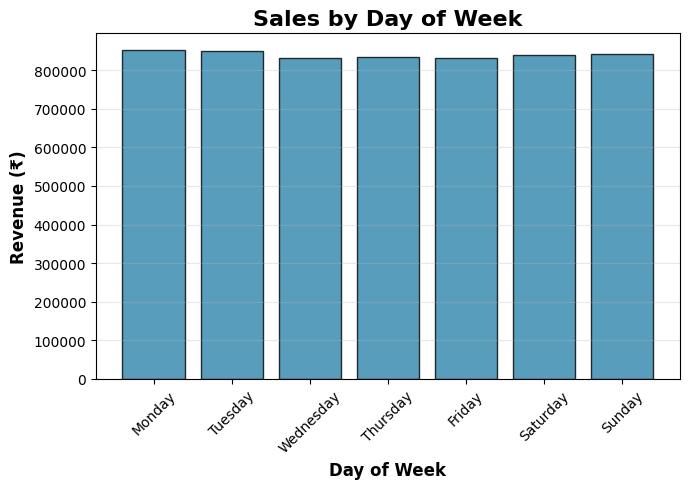

In [30]:
pl.figure(figsize=(7, 5))

# Day of week
pl.bar(day_sales.index, day_sales['Revenue'], color='#2E86AB', alpha=0.8, edgecolor='black')
pl.xlabel('Day of Week', fontsize=12, fontweight='bold')
pl.ylabel('Revenue (₹)', fontsize=12, fontweight='bold')
pl.title('Sales by Day of Week', fontsize=16, fontweight='bold')

pl.grid(True, alpha=0.3, axis='y')
pl.xticks(rotation=45)
pl.tight_layout()
pl.show()

In [31]:
# Predictive Analysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

forecast_data = pd.DataFrame({
    'Revenue': monthly_revenue.values,
    'YearMonth_dt': monthly_revenue.index
})

forecast_data = forecast_data.reset_index(drop=True)

forecast_data['Month_Number'] = range(len(forecast_data))
forecast_data.tail(5)

,Revenue,YearMonth_dt,Month_Number
19,259158.65,2024-08-01,19
20,252358.53,2024-09-01,20
21,264229.39,2024-10-01,21
22,178794.09,2024-11-01,22
23,175066.14,2024-12-01,23


In [32]:
# Split train/test (70/30)
train_size = int(len(forecast_data) * 0.7)
train = forecast_data[:train_size]
test = forecast_data[train_size:]

X_train = train[['Month_Number']]
y_train = train['Revenue']
X_test = test[['Month_Number']]
y_test = test['Revenue']

print(f"Training set: {len(train)} months")
print(f"Test set: {len(test)} months")

Training set: 16 months
Test set: 8 months


In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

Slope: -1303.241514705881
Intercept: 257392.2507352941


In [34]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"fR2: {r2:.4f}")
print(f"MAPE: {mape:.4f} %")

MAE: 33588.4371
MSE: 1247407346.2790
fR2: 0.0726
MAPE: 15.1786 %


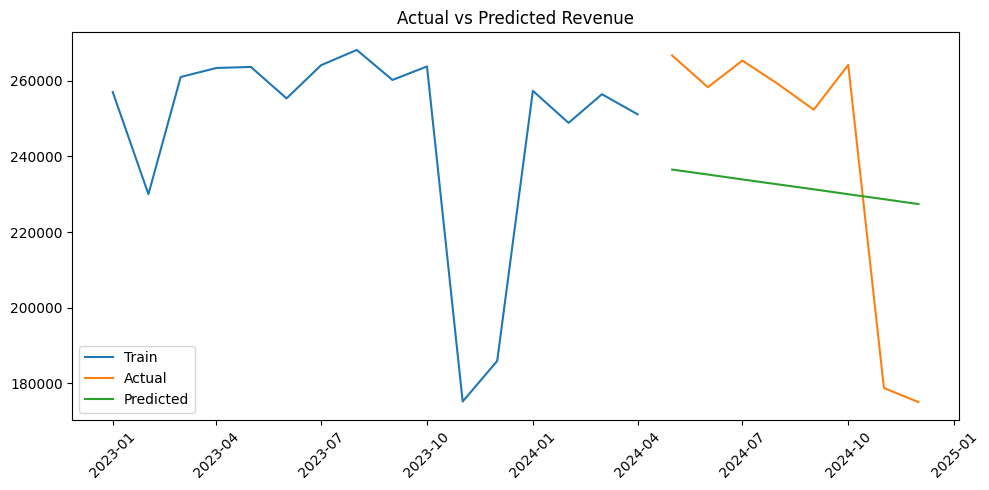

In [35]:
pl.figure(figsize=(10,5))

pl.plot(train['YearMonth_dt'], y_train, label='Train')
pl.plot(test['YearMonth_dt'], y_test, label='Actual')
pl.plot(test['YearMonth_dt'], y_pred, label='Predicted')

pl.legend()
pl.title("Actual vs Predicted Revenue")
pl.xticks(rotation=45)
pl.tight_layout()
pl.show()

In [36]:
# Forecast next 6 months
future_months = 6
last_month = forecast_data['Month_Number'].max()

future_month_numbers = pd.DataFrame({
    'Month_Number': [last_month + i for i in range(1, future_months + 1)]
})

future_predictions = model.predict(future_month_numbers)

print(f"\nSales Forecast for Next {future_months} Months:")
print("-" * 50)

total_forecast = 0

for i, pred in enumerate(future_predictions, 1):
    print(f"Month +{i}: ₹{pred:,.2f}")
    total_forecast += pred

print("-" * 50)
print(f"Total Forecasted Revenue (6 months): ₹{total_forecast:,.2f}")
print(f"Average Monthly Forecast: ₹{total_forecast/future_months:,.2f}")


Sales Forecast for Next 6 Months:
--------------------------------------------------
Month +1: ₹226,114.45
Month +2: ₹224,811.21
Month +3: ₹223,507.97
Month +4: ₹222,204.73
Month +5: ₹220,901.49
Month +6: ₹219,598.25
--------------------------------------------------
Total Forecasted Revenue (6 months): ₹1,337,138.10
Average Monthly Forecast: ₹222,856.35


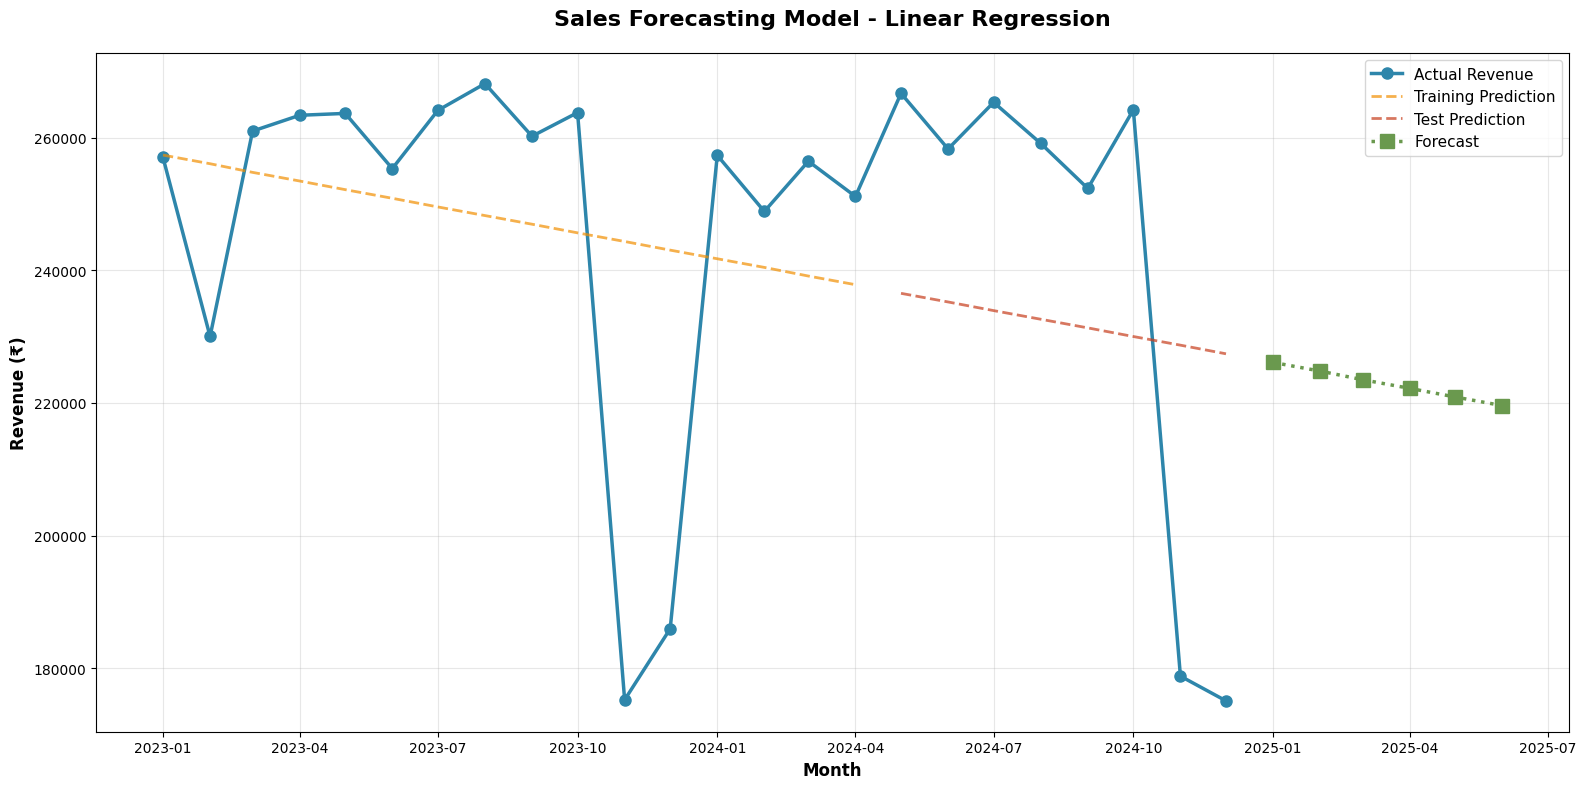

In [37]:
pl.figure(figsize=(16,8))
# Actual data
pl.plot(forecast_data['YearMonth_dt'], forecast_data['Revenue'], 
         label='Actual Revenue', marker='o', linewidth=2.5, markersize=8, color='#2E86AB')

# Training predictions
pl.plot(train['YearMonth_dt'], y_train_pred, 
         label='Training Prediction', linestyle='--', linewidth=2, color='#F18F01', alpha=0.7)

# Test predictions
pl.plot(test['YearMonth_dt'], y_pred, 
         label='Test Prediction', linestyle='--', linewidth=2, color='#C73E1D', alpha=0.7)

# Future forecast
last_date = forecast_data['YearMonth_dt'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_months, freq='MS')
pl.plot(future_dates, future_predictions, 
         label='Forecast', marker='s', linestyle=':', linewidth=2.5, markersize=10, color='#6A994E')

# Formatting
pl.title('Sales Forecasting Model - Linear Regression', fontsize=16, fontweight='bold', pad=20)
pl.xlabel('Month', fontsize=12, fontweight='bold')
pl.ylabel('Revenue (₹)', fontsize=12, fontweight='bold')
pl.legend(fontsize=11)
pl.grid(True, alpha=0.3)
pl.tight_layout()
pl.savefig('sales_forecast.png', dpi=300, bbox_inches='tight')
pl.show()

In [38]:
future_predictions

array([226114.45438235, 224811.21286765, 223507.97135294, 222204.72983824,
       220901.48832353, 219598.24680882])